In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
data = load_iris()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
df['class'] = data.target

In [ ]:
df['class'] = df['class'].map({0:data.target_names[0],1:data.target_names[1],2:data.target_names[2]})

In [ ]:
df.head()

In [ ]:
df[['sepal length (cm)','sepal width (cm)','class']]

In [ ]:
df['wide petal'] = df['petal width (cm)'].apply(lambda s: 1 if s>df['petal width (cm)'].mean() else 0)

In [ ]:
df['petal area'] = df.apply(lambda d: d['petal length (cm)']*d['petal width (cm)'], axis=1)

In [ ]:
ds = df.copy(deep=True)

In [ ]:
ds.applymap(lambda c: np.log(c) if isinstance(c, float) else c)

In [ ]:
df.groupby('class').mean()

In [ ]:
df.groupby('class').describe()

In [ ]:
df.groupby('petal width (cm)')['class'].unique()

In [ ]:
df.groupby('class')['petal width (cm)'].agg(max = np.max, min = np.min, delta = lambda s: s.max()-s.min())

#### statsmodels

In [51]:
import statsmodels.api as sm

Text(0, 0.5, 'sepal length (cm)')

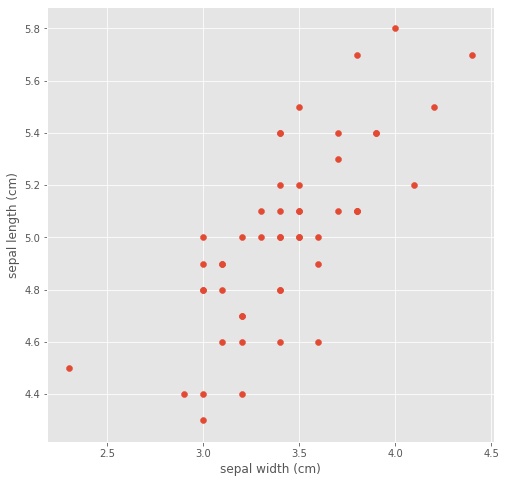

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df['sepal width (cm)'][:50],df['sepal length (cm)'][:50])
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('sepal length (cm)')

In [ ]:
x = df['sepal width (cm)'][:50]
y = df['sepal length (cm)'][:50]
X = sm.add_constant(x)

In [56]:
results = sm.OLS(y, X).fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      sepal length (cm)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           6.71e-10
Time:                        14:45:05   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6390      0.310  

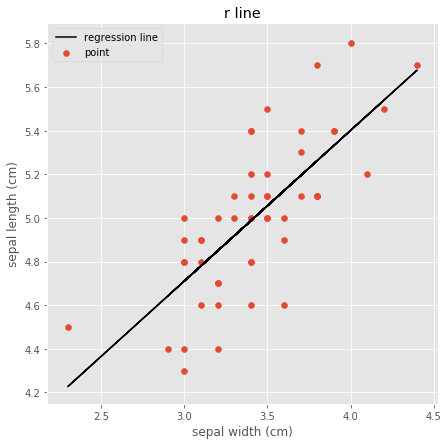

In [58]:
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, c='black', label='regression line')
ax.scatter(x,y, label='point')
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('sepal length (cm)')
ax.set_title('r line')
ax.legend(loc=2)

##### scikit-learn